In [3]:
# coding: utf-8
import sys
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import time
from numpy import eye
from LoadMZML import LoadMZML
from OptimalMzV2 import OptimalMz
from PlotImage import PlotImage
from TemplateOverlay import TemplateOverlay
% matplotlib inline

# Parameters

In [4]:
class Parameters:
    def __init__(self):
        #  self.filename = '/Users/simon/Dropbox/MS_Ink_Data/ALphabet/abcdefgh_1.mzML'
        self.filename = '..\\data\\abcdefgh_1.mzML'
        self.lines = 8
        self.widthInMM = 62
        self.heightInMM = 10
        self.downMotionInMM = 1.25
        
template_path = '..\\data\\abcdef-F.png'
generated_b = 137
generated_e = 462
template_b = 343
template_e = 1180
plotValues = (374, 376)

Used to find parameters

In [5]:
#PlotImage(loadMZML, param).save("abcdef_gen",plotValues)

In [6]:
param = Parameters()
loadMZML = LoadMZML(param)
plotImage = PlotImage(loadMZML, param)
templateOverlay = TemplateOverlay(loadMZML, param)

Template Image

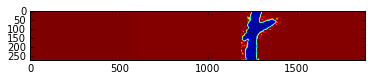

In [7]:
template = Image.open(template_path)
plt.figure()
plt.imshow(np.asarray(template))

Black and White

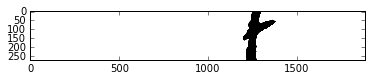

In [8]:
template = templateOverlay.RGBtoBW(template_path)
plt.figure()
plt.imshow(np.asarray(template), cmap='Greys_r')

# Overlay template and generated

100%
11.13s


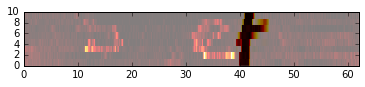

In [9]:
#Scale Template
template = templateOverlay.alignTemplate(generated_b, generated_e, template_b, template_e, template)
#Shift generated
generated = templateOverlay.alignGenerated(generated_b, generated_e, template_b, template_e, plotValues)
#Make both the same size
template, generated = templateOverlay.alignment(template, generated)

plt.figure()
plt.imshow(np.asarray(generated), extent=[0, param.widthInMM, 0, param.heightInMM], interpolation='none', cmap='hot')
plt.imshow(np.asarray(template), extent=[0, param.widthInMM, 0, param.heightInMM], interpolation='none', cmap='hot',
           alpha=0.5)  # 0 fully transparent

# Calculate optimal mass based on template

100%
190.71s
i1 - i:
[-443.05830606  -78.28378329  -48.49183265  -42.82873087  -17.06673766
   -7.12777395   -3.66502125   -3.12822567   -3.09629508   -2.86211144]

mz:
[(354.0, 355.0), (355.0, 356.0), (476.0, 477.0), (359.0, 360.0), (432.0, 433.0), (410.0, 411.0), (398.0, 399.0), (382.0, 383.0), (356.0, 357.0), (407.0, 408.0)]

Not letters 5979 below are [4582 4671 5941 4079 5948 5335 5910 5886 5573 5887] of [ 76.63488878  78.12343201  99.36444221  68.22211072  99.48151865
  89.22896805  98.84596086  98.44455595  93.20956682  98.46128115]%

i:
[ 2635.41888687   588.39978167   145.91687627  1025.92189896    98.30008541
   125.03412369    80.17927428    80.21385693   109.17689339    79.11575213]
i1:
[ 2128.32746039   498.80201362    90.41674851   976.90333429    78.76677291
   116.8762063     75.98456485    76.63352361   105.63310543    75.83999327]
c:
[5298 4242  644 4385  528 1802  451  317 1047  447]
c1:
[137965 106143  12347 119419  11521  37045  10669  11317  28604  11727]
range:
1

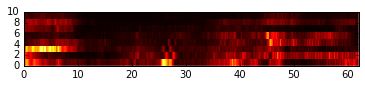

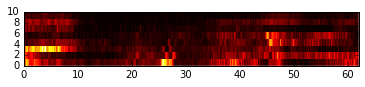

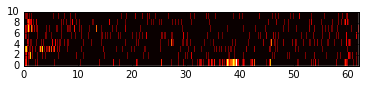

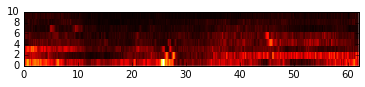

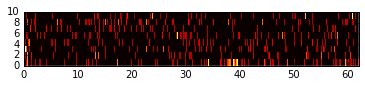

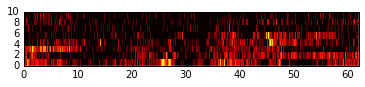

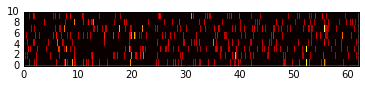

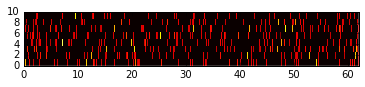

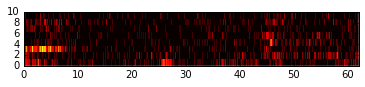

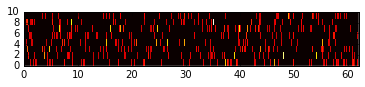

In [11]:
# Calculate optimal mass based on template
optimalMz = OptimalMz.V2(loadMZML, mzRangeLower=0, mzRangeHighest=500, resolution=500,
                         templateClass=templateOverlay)
optimalMz.printN(10)
# optimalMzII.plot()
for i, j in optimalMz.getN(10):
    plotImage.plotImshowII((i, j))